In [2]:
# Question 1

# 1. Regression is when you are predicting a numeric outcome. Classification is when you are predicting a categorical outcome. 
# 2. A confusion table is used to evaluate the the performance of a classfication model. It is a cross tabulation of predicted and actual values. It helps with the accuracy of the model's performqnce, whether you are getting good or bad results. 
# 3. It quantifies the total error between the model prediction and the actual observed data. 
# 4. Overfitting is hen your model is too complex to reliably explain the phenomenon you are interested in. Underfitting is when your model is too simple to reliably explain the phenomenon you are interested in. 
# 5. It allows you to choose a model that will likely perform well in the real world. This will help with importance of the data. 
# 6. For a class label as a prediction, the strengths are that they are fast and simple. The weaknesses are that they are much less intuitive. For a class label as a probability, the strengths are that they are more flexible and captures more uncertainty. The weaknesses are that they require much more interpretation. 

In [3]:
#Question 2

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv('./data/USA_cars_datasets.csv')

# 1: Load the ./data/USA_cars_datasets.csv. Keep the following variables and drop the rest: price, year, mileage. Are there any NA's to handle? Look at the head and dimensions of the data.
y = df['price']
df = df.loc[:, ['price', 'year', 'mileage']].dropna()

print("df.shape:")
print(df.shape, '\n')

print("df.dtypes:")
print(df.dtypes, '\n')

print("df.columns:")
print(df.columns, '\n')

df.isna().any()
df.head()

# There were no NA's when looking at the results. 


df.shape:
(2499, 3) 

df.dtypes:
price      int64
year       int64
mileage    int64
dtype: object 

df.columns:
Index(['price', 'year', 'mileage'], dtype='object') 



,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [4]:
# 2(2+3): Maxmin normalize year and mileage.

def maxmin(z):
    return (z - z.min()) / (z.max() - z.min())
X = df[['year', 'mileage']].apply(maxmin)

# 2(4): Split the sample into ~80% for training and ~20% for evaluation.

X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

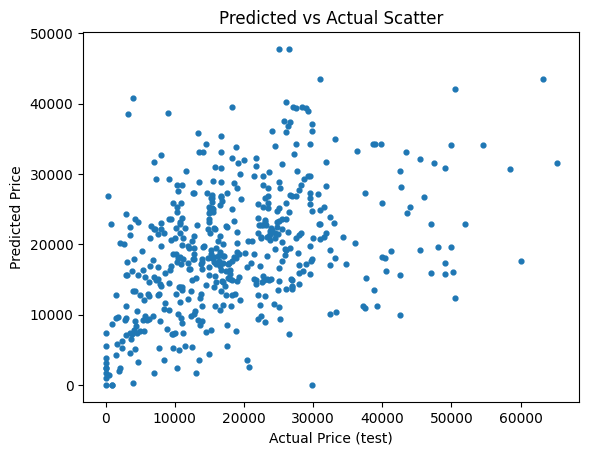

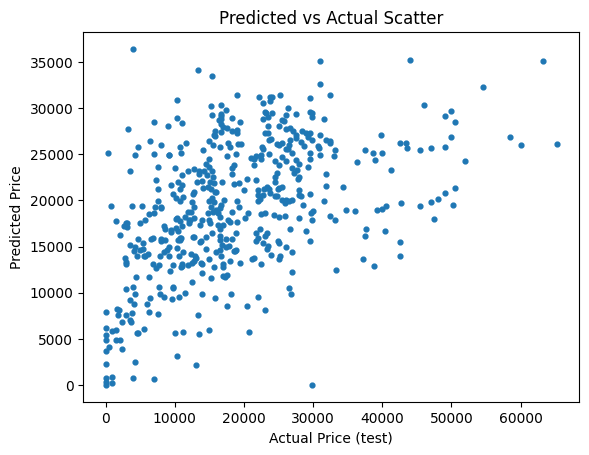

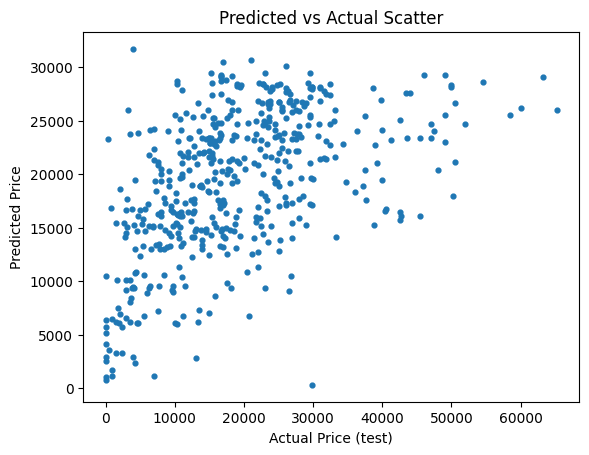

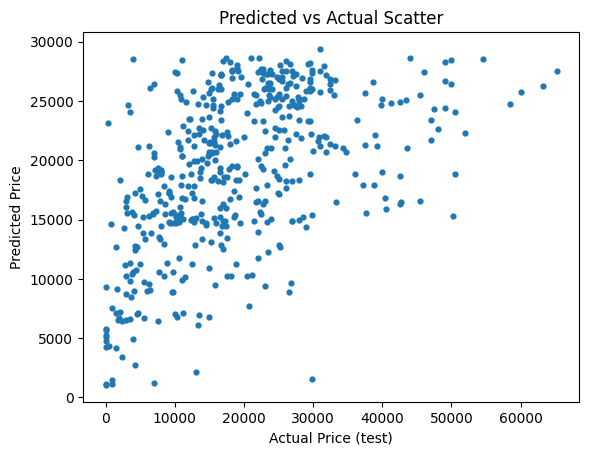

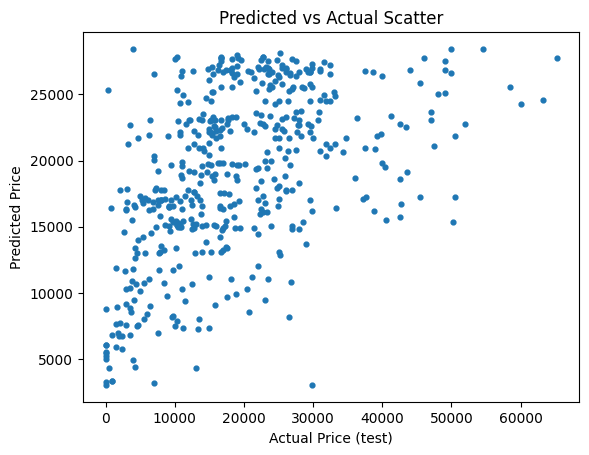

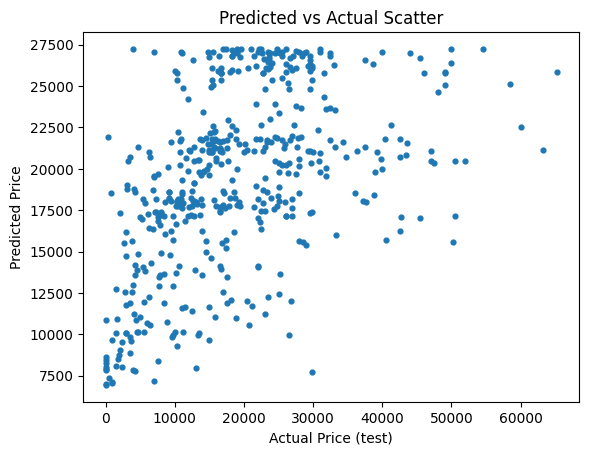

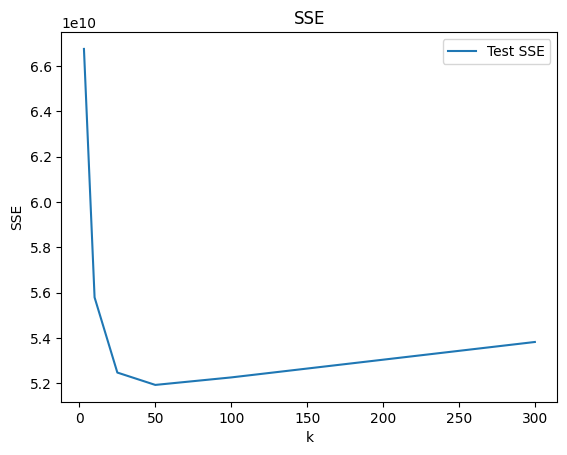

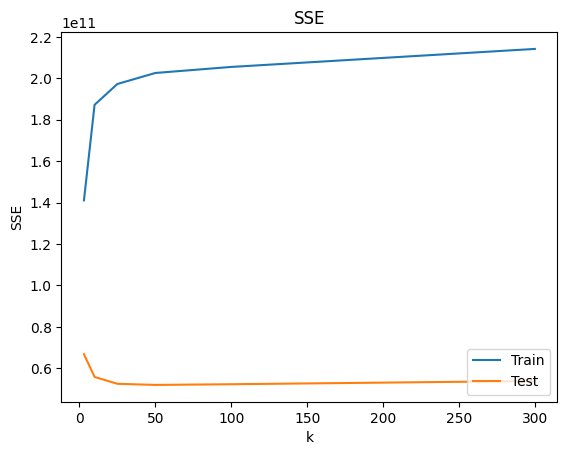

In [9]:
# 2(4): Use the NN algorithm and the training data to predict price using year and mileage for the test set for. For each value of k, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase k?

k_bar = [3, 10, 25, 50, 100, 300]
SSE = []
SSE_on_train = []

for k in k_bar:
    model = KNeighborsRegressor(n_neighbors=k) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat_test = fitted_model.predict(X_test) # Predict values for test set
    SSE.append(np.sum((y_test-y_hat_test) ** 2)) # Save the computed SSE for test set
    y_hat_train = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train.append( np.sum( (y_train-y_hat_train)**2 ) ) # Save the computed SSE
    
    plt.figure()
    plt.scatter(y_test, y_hat_test, s=12)
    plt.xlabel('Actual Price (test)')
    plt.ylabel('Predicted Price')
    plt.title('Predicted vs Actual Scatter')
    plt.show()

plt.plot(k_bar,SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

plt.plot(k_bar,SSE_on_train,label='Train') # Plot SSE by k
plt.plot(k_bar,SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

# As k increases, the test SSE first decreases and then slowly increases. 

In [6]:
# 2(5): Determine the optimal k for these data.

SSE_min = np.min(SSE) # Find lowest recorded SSE
min_index = np.where(SSE==SSE_min) # Find the indices of SSE that equal the minimum
k_star = min_index[0]+1 # Find the optimal value of k; why index+1?
print(k_star)

[4]


In [7]:
# 2(6): Describe what happened in the plots of predicted versus actual prices as k varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

# At smaller values of k, the data was much more tightly clusetered around the actual values showing signs of overfitting but had more variation. As k increased, the line smoothed out and showed underfitting because they become much less responsive to the data and did not show as much pattern. 

In [8]:
# Citation: OpenAI. (2023). ChatGPT (September 19 version) [Large language model]. https://chat.openai.com/chat